# Clonal inference P6

In this notebook I run the clonal inference model on P6. This patient has the following alterations:


* IDH2
* NPM1 
* mt:11426G>A

There is bulk data for myeloid cells and T cells separately 


## Import packages 

<br>



In [1]:
# Import packages
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import itertools
import os
import pickle
import collections

import time
from datetime import datetime
from timeit import default_timer as timer
from datetime import timedelta

import pyro
import pyro.distributions as dist
import pyro.poutine as poutine
from pyro.infer import SVI, Trace_ELBO, TraceEnum_ELBO, config_enumerate
from pyro.optim import Adam, AdagradRMSProp
from torch.distributions import constraints
pyro.set_rng_seed(100)

# import helper functions and tree class form source code files (present in the same directory)
from helper_functions import *

In [2]:
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
patient = "P6"

# Create tree class object

This class contains all functions required to run the model and to generate diagnostic plots. 

In [18]:
input_file = "../data/input_" + patient + ".json"
t = create_tree_class(input_file, name = patient, mult_samp = True, cnv_celltype = True, gpu = True)

# Run model


In [19]:
# select initial 2 mutations based on the proportion of cells covered
t.sel_mutation(initial = True)

tensor([2, 0])

In [20]:
t.names

['NPM1', 'IDH2', 'X11426.G.A']

## Initial tree with NPM1 & mt:11426G>A

In [21]:
t.select_tree(num_iter = 300, init = 200)

Choosing best tree among 4 potential candidates
Model fit to tree 0 in 0m 50s
Model fit to tree 1 in 0m 51s
Model fit to tree 2 in 0m 48s
Model fit to tree 3 in 0m 48s
Trees [0, 1, 3] selected for mutations ['X11426.G.A', 'NPM1']
tensor([[0., 0.],
        [1., 0.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [1., 1.]])
Total run time 0h 3m 19s


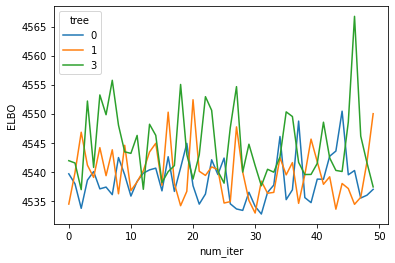

In [22]:
t.print_elbo(num_iter = 300, init = 250, include = [0,1,3])

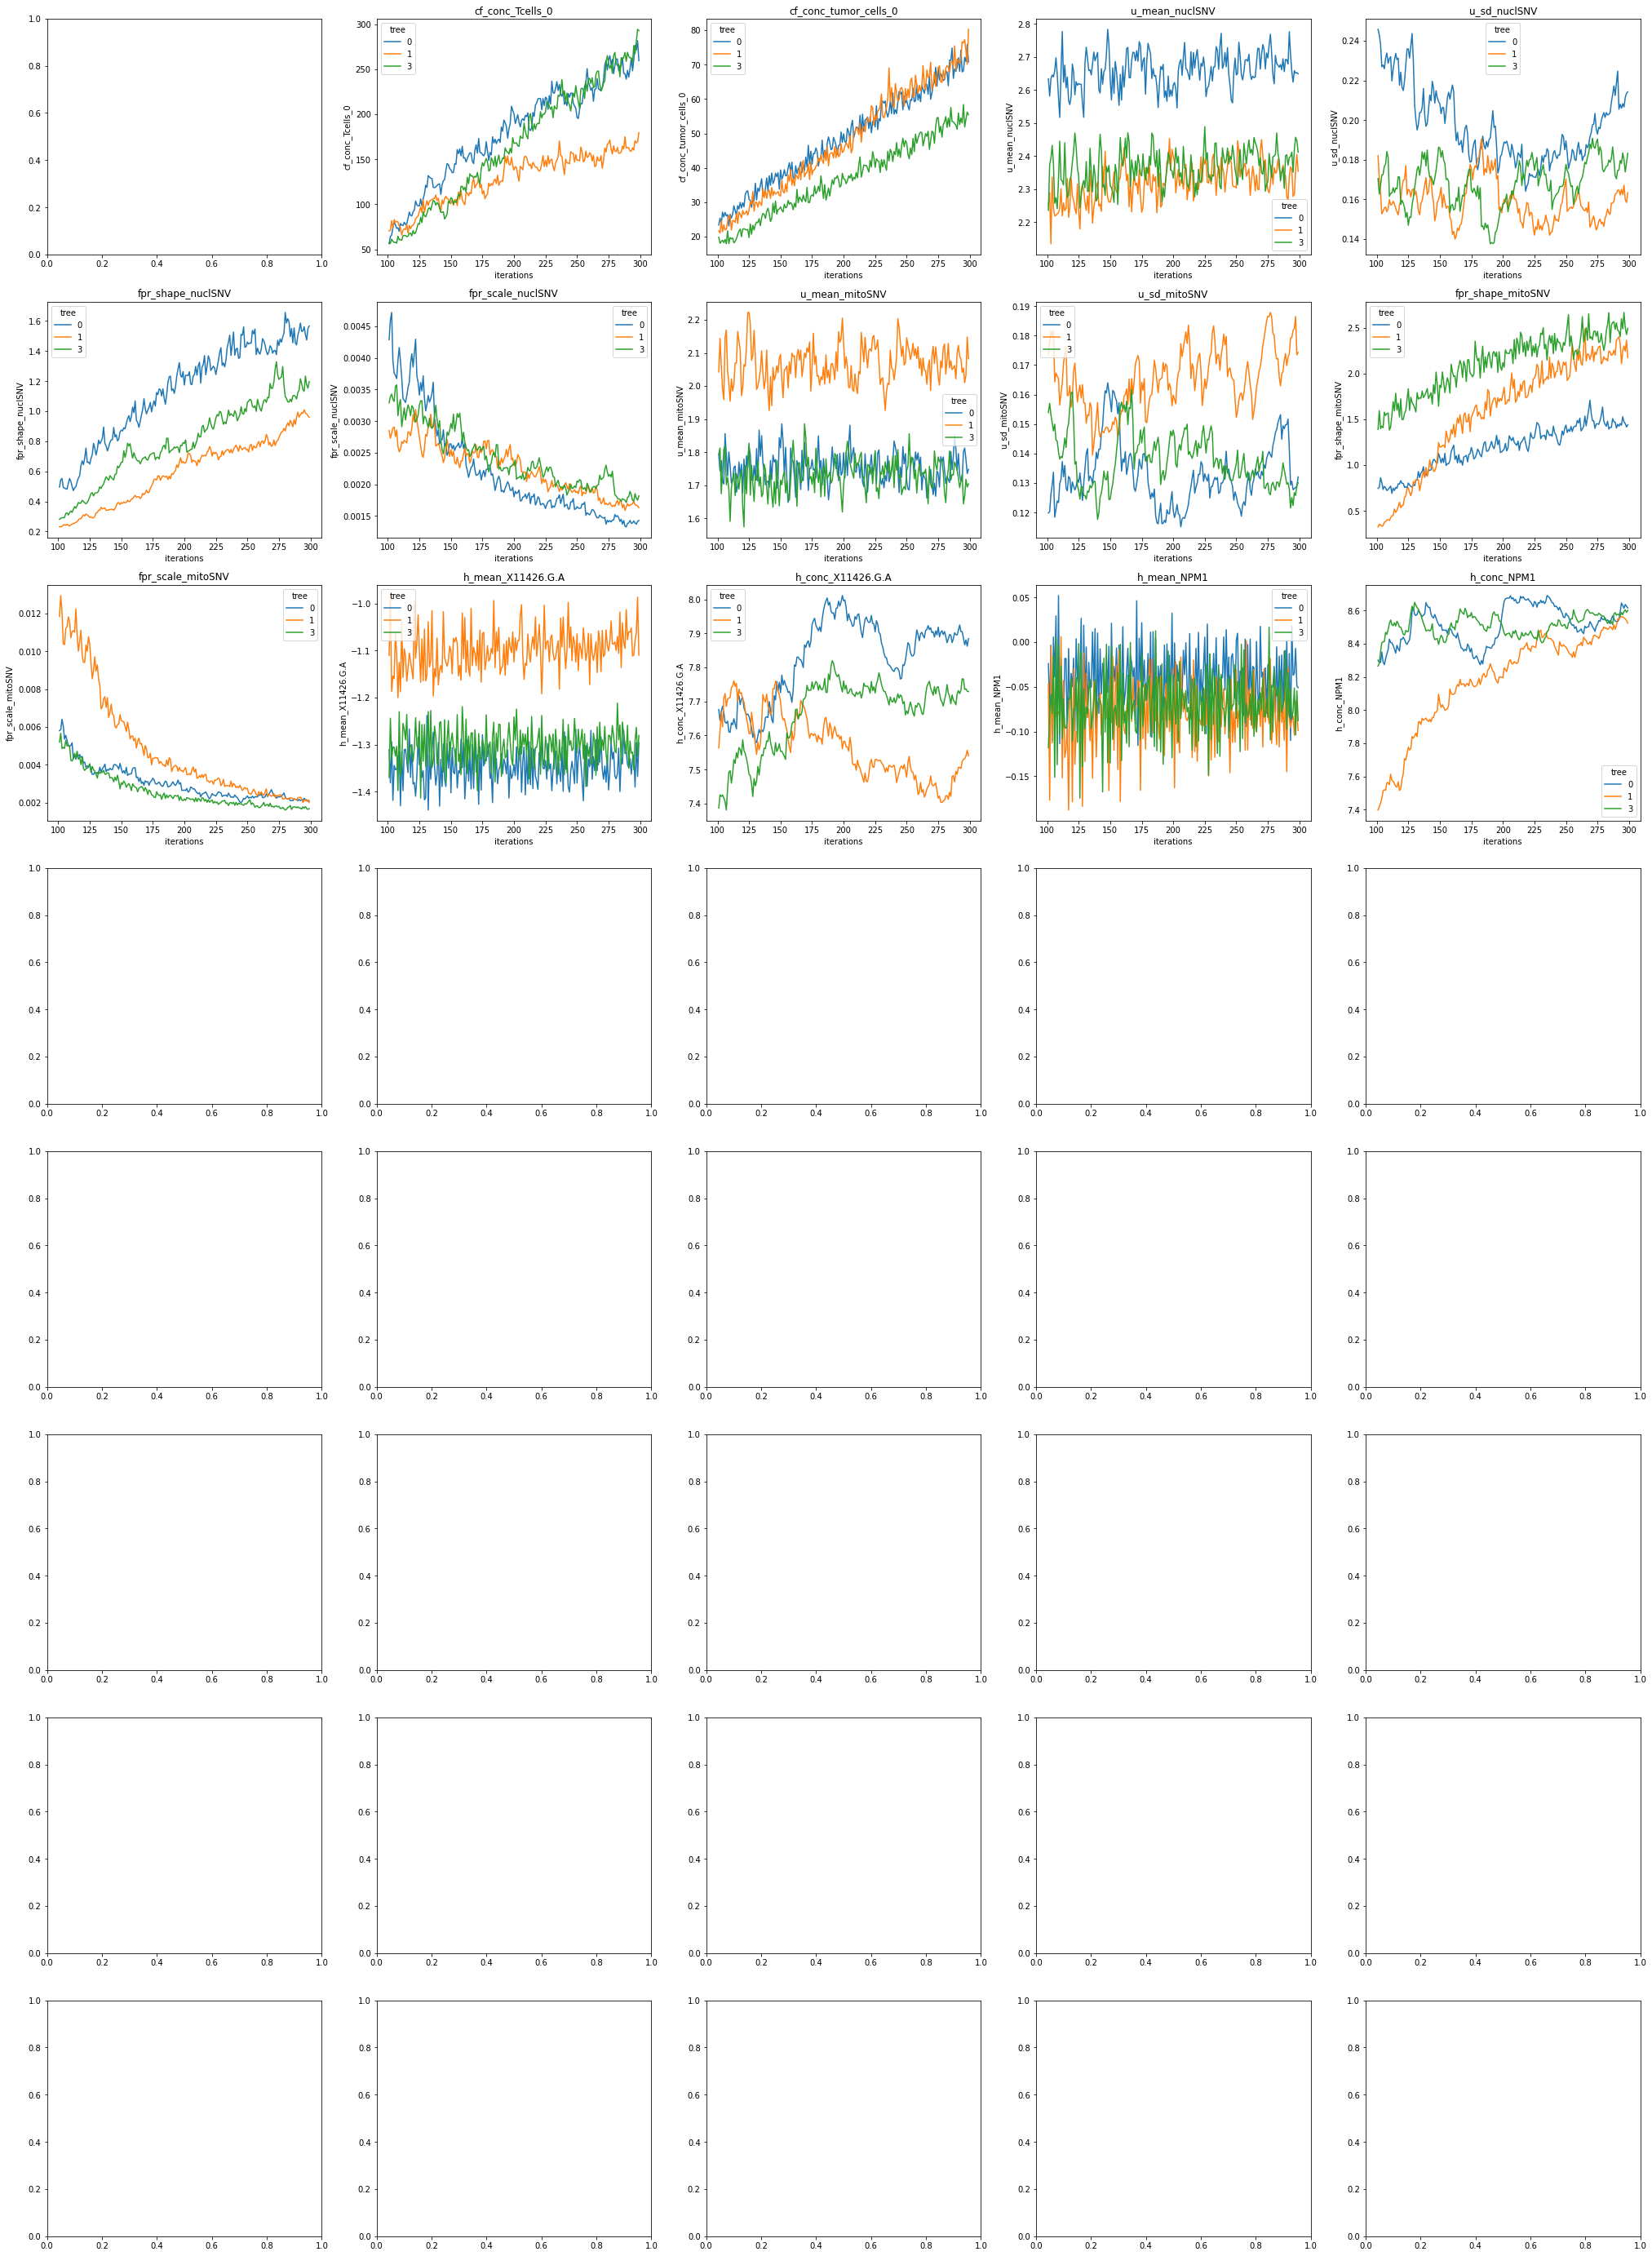

In [23]:
t.print_params(include = t.tree_indices, it = 100)

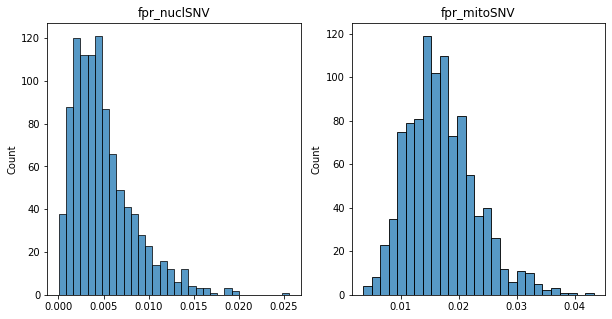

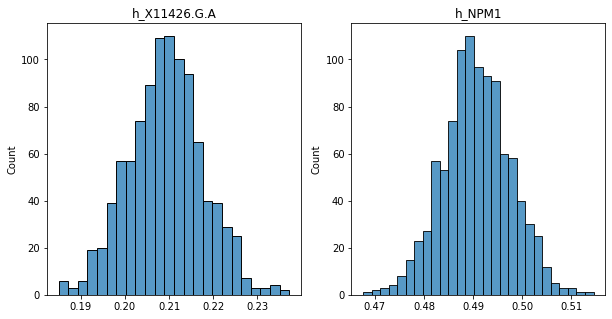

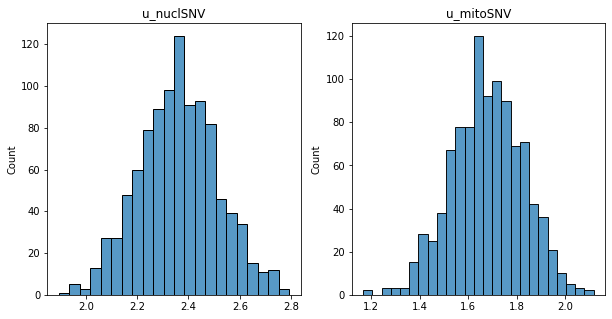

In [24]:
t.plot_posterior("all", 3, 1000)

## Add IDH2

In [25]:
# add mutation and select the best tree(s)
t.add_mutation()
t.select_tree(num_iter = 400, init = 200)

IDH2 added to the tree
Choosing best tree among 18 potential candidates
Model fit to tree 0 in 1m 21s
Model fit to tree 1 in 1m 21s
Model fit to tree 2 in 1m 20s
Model fit to tree 3 in 1m 21s
Model fit to tree 4 in 1m 21s
Model fit to tree 5 in 1m 23s
Model fit to tree 6 in 1m 21s
Model fit to tree 7 in 1m 21s
Model fit to tree 8 in 1m 20s
Model fit to tree 9 in 1m 20s
Model fit to tree 10 in 1m 22s
Model fit to tree 11 in 1m 21s
Model fit to tree 12 in 1m 19s
Model fit to tree 13 in 1m 23s
Model fit to tree 14 in 1m 22s
Model fit to tree 15 in 1m 21s
Model fit to tree 16 in 1m 20s
Model fit to tree 17 in 1m 21s
Trees [11, 12, 13] selected for mutations ['X11426.G.A', 'NPM1', 'IDH2']
tensor([[0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 1., 0.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
Total run time 0h 24m 25s


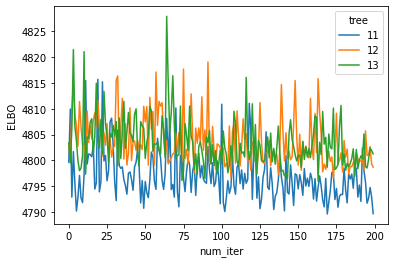

In [26]:
t.print_elbo(num_iter = 400, init = 200, include = t.tree_indices)

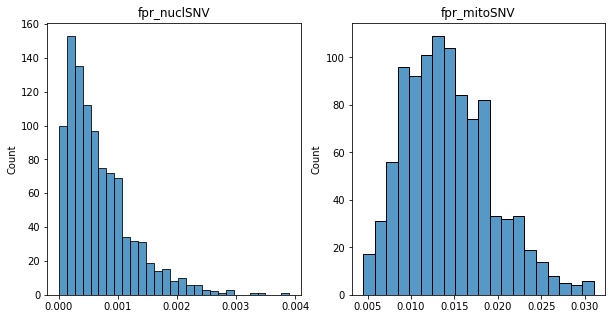

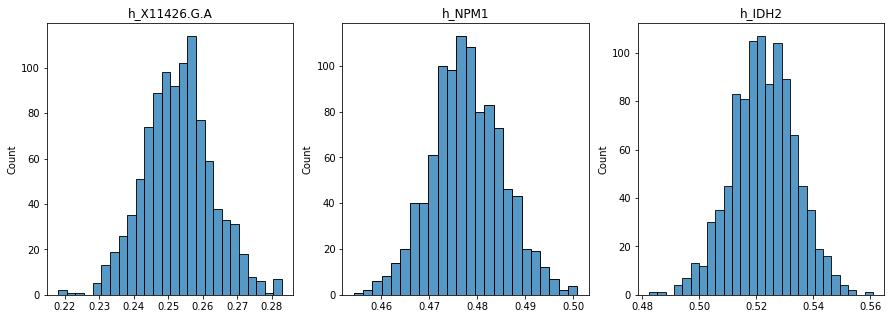

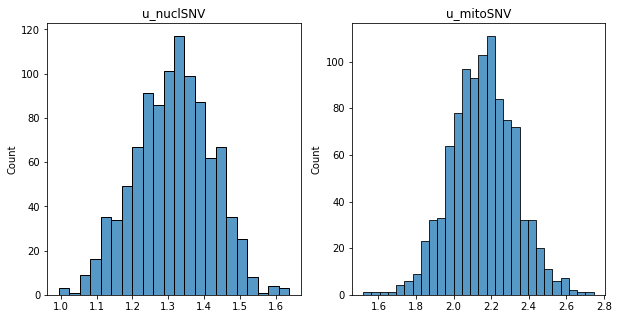

In [27]:
t.plot_posterior(variables = "all", tree = 11)

# Compute clonal assignments

In [34]:
for i in range(len(t.tree_indices)):
    t.clonal_assignment(tree = i)

Computing clonal assignment probabilities for tree 0
Clonal assignment probabilities computed in 1m and 52s
Computing clonal assignment probabilities for tree 1
Clonal assignment probabilities computed in 1m and 52s
Computing clonal assignment probabilities for tree 2
Clonal assignment probabilities computed in 1m and 53s


In [35]:
# export object as pickle
t.export_pickle("svi_objects/"+patient+".pickle")

Tree object saved as pickle!
